### OBJECTIVE

The objective of this project is to assess 

In [1]:
#Importing necessary libraries 

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas_datareader as pdr 
import datetime as dt
import numpy as np
from matplotlib.dates import DateFormatter
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm 


In [2]:
# Get data from yahoo finance using pandas_datareader

ticker =['RUB=X']
start = dt.datetime(2020, 1, 1)

data = pdr.get_data_yahoo(ticker, start)


### DATA CLEANING

In [3]:
data['Date'] = data.index
data.head(5)

Attributes,Adj Close,Close,High,Low,Open,Volume,Date
Symbols,RUB=X,RUB=X,RUB=X,RUB=X,RUB=X,RUB=X,
Date,,,,,,,
2020-01-01,62.028301,62.028301,62.028301,62.028301,62.028301,0,2020-01-01
2020-01-02,61.830002,61.830002,62.147999,61.563000,61.830002,0,2020-01-02
2020-01-03,61.694199,61.694199,62.224998,61.694199,61.694199,0,2020-01-03
2020-01-06,62.029999,62.029999,62.323002,61.717499,62.013802,0,2020-01-06
2020-01-07,61.775002,61.775002,62.086201,61.591702,61.775101,0,2020-01-07


In [4]:
data.columns

MultiIndex([('Adj Close', 'RUB=X'),
            (    'Close', 'RUB=X'),
            (     'High', 'RUB=X'),
            (      'Low', 'RUB=X'),
            (     'Open', 'RUB=X'),
            (   'Volume', 'RUB=X'),
            (     'Date',      '')],
           names=['Attributes', 'Symbols'])

In [5]:
data.columns = ['Adj_close','Close','High', 'Low', 'Open','Volume', 'Date']

In [6]:
data= data.drop(['Close','High', 'Low', 'Open','Volume'], axis =1)

In [7]:
data.isnull().sum()

Adj_close    0
Date         0
dtype: int64

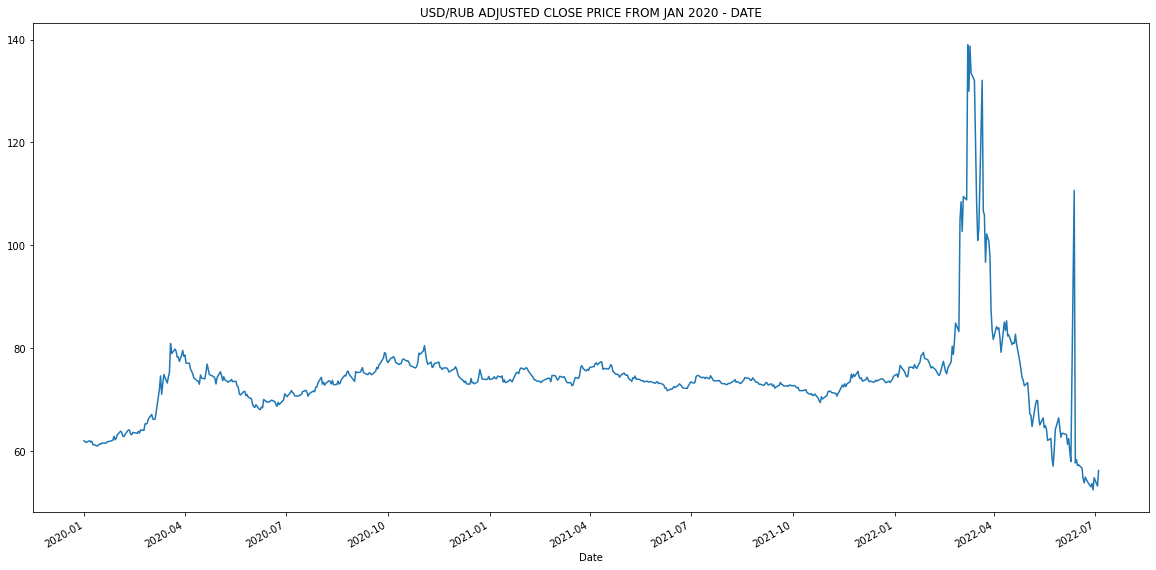

In [8]:
#Adj price till date
data['Adj_close'].plot(figsize = (20,10))

plt.title('USD/RUB ADJUSTED CLOSE PRICE FROM JAN 2020 - DATE');

In [9]:
data.tail()

,Adj_close,Date
Date,,
2022-06-28,53.714901,2022-06-28
2022-06-29,52.465099,2022-06-29
2022-06-30,54.840000,2022-06-30
2022-07-03,53.237499,2022-07-03
2022-07-04,56.250000,2022-07-04


## INTRODUCTION TO TIME SERIES ANALYSIS

### DECOMPOSING THE DATA  


- Real world data is not stationary most times and is governed by Trends, Seasonal, and Residual/Noise components that are deterministic.


- In order to remove these deterministic components, we DECOMPOSE all the components from the data and try to make it stationary, using

            - Additive Time Series = T + S + Residual/Noise
            
                    OR 
                    
            - Multiplicative Time Series = T * S * Residual/Noise
            
- Where Additive is the sum of all components and Multiplicative is the product of the components.


- These components are decomposed in orders;


   - TREND : Trend can be calculated by either using 
          
      - Moving Average (Does not work well if the timeseries includes period of inactivity)
          
      - Median(works well with outliers)
            
 
 
  - SEASONALITY: Seasonality can be derived by getting the mean value of the detrended(value -trend (for additive time series) and value/trend (for multiplicative time series)) observations
  
  
    
  - RESIDUAL : residual can be calculated by either subtracting the seasonality from detrended(detrended - seasonality) or diving detrended by seasonality(detrended/seasonality), each fomulas are additive and multiplicative time series respectively
  


# ALL THESE CAN BE VISUALIZED BELOW

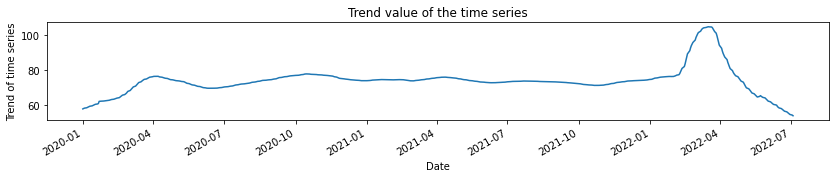

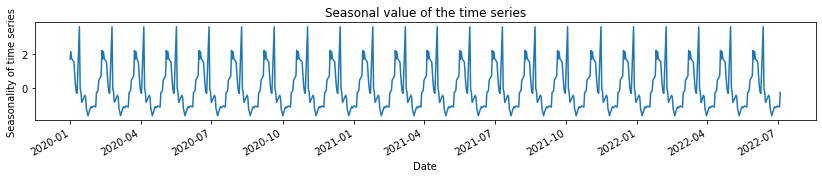

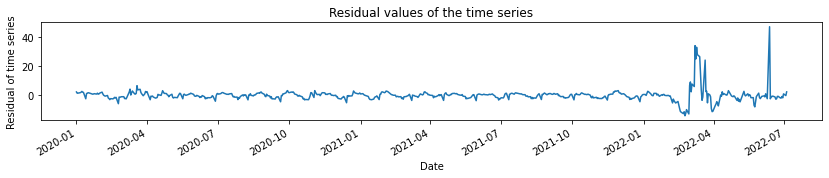

In [10]:
## ADDITIVE TIME SERIES

decomposition = sm.tsa.seasonal_decompose(x = data['Adj_close'], model= 'additive',
                                         extrapolate_trend = 'freq', period =30)

plt.show()

# Decomposing the Trend and Seasonality
decom_trend = decomposition.trend
ax = decom_trend.plot(figsize=(14,2))
ax.set_xlabel('Date')
ax.set_ylabel('Trend of time series')
ax.set_title('Trend value of the time series')
plt.show()


decom_season = decomposition.seasonal
ax = decom_season.plot(figsize=(14,2))
ax.set_xlabel('Date')
ax.set_ylabel('Seasonality of time series')
ax.set_title('Seasonal value of the time series')
plt.show()


# Calculating the Residual
decom_residual = decomposition.resid
ax = decom_residual.plot(figsize = (14,2))
ax.set_xlabel('Date')
ax.set_ylabel('Residual of time series')
ax.set_title('Residual values of the time series')
plt.show()

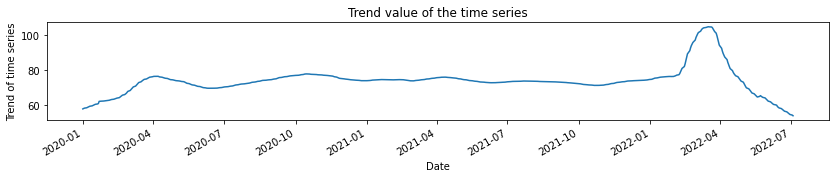

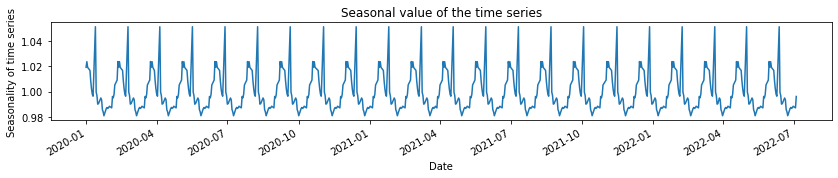

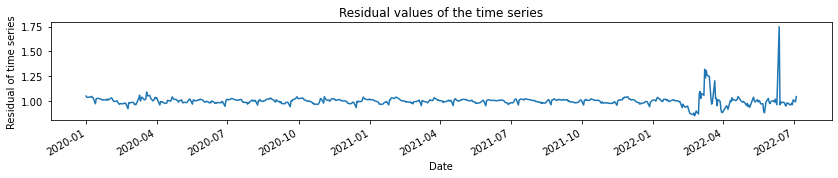

In [11]:
#MULTIPLICATIVE TIME SERIES


decomposition = sm.tsa.seasonal_decompose(x = data['Adj_close'], model= 'multiplicative',
                                         extrapolate_trend = 'freq', period =30)

plt.show()





# Decomposing the Trend and Seasonality

decom_trend = decomposition.trend
ax = decom_trend.plot(figsize=(14,2))
ax.set_xlabel('Date')
ax.set_ylabel('Trend of time series')
ax.set_title('Trend value of the time series')
plt.show()




decom_season = decomposition.seasonal
ax = decom_season.plot(figsize=(14,2))
ax.set_xlabel('Date')
ax.set_ylabel('Seasonality of time series')
ax.set_title('Seasonal value of the time series')
plt.show()


# Calculating the Residual
decom_residual = decomposition.resid
ax = decom_residual.plot(figsize = (14,2))
ax.set_xlabel('Date')
ax.set_ylabel('Residual of time series')
ax.set_title('Residual values of the time series')
plt.show()

In [12]:
data['Adj_close']

Date
2020-01-01    62.028301
2020-01-02    61.830002
2020-01-03    61.694199
2020-01-06    62.029999
2020-01-07    61.775002
                ...    
2022-06-28    53.714901
2022-06-29    52.465099
2022-06-30    54.840000
2022-07-03    53.237499
2022-07-04    56.250000
Name: Adj_close, Length: 655, dtype: float64

# ASSESSING FOR FIT AND CORRELATION

- This section test for direct and/or indirect correlation in the time series. Using Auto-correlation function(ACF) or Partial auto-correlation function(PCF).



- ACF: ACF includes the direct and indirect correlation over a period of time. In this project we are looking at period of 30 days(lag =30). ACF is used to determine the lag which is represented by q in the ARIMA model. In this case q = 17 where 17 is the spike that is right above the confidence intereval before the preceeding spikes below the confidence interval(See graph below) Pic 1



- PACF: Taking all the indirect effect away. Shows the direct correlation in the time series over a period of time(lag=30). PACF is used to determine the lag which is represented by p in the ARIMA model. In this case p = 2 where 2 is the spike that is right above the confidence intereval before the preceeding spikes below the confidence interval(See graph below)Pic 2







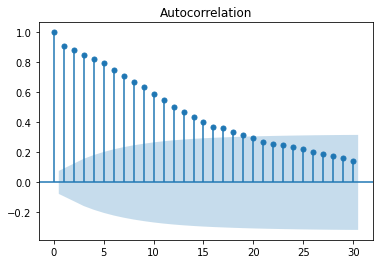

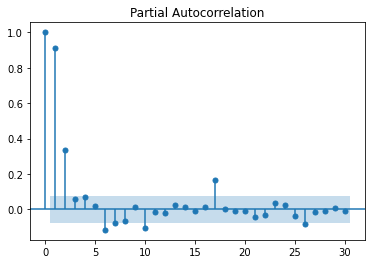

In [13]:
sm.graphics.tsa.plot_acf(data['Adj_close'].squeeze(),lags=30) #plotting the acf graph for a time period of 15days

sm.graphics.tsa.plot_pacf(data['Adj_close'].squeeze(),lags=30) #plotting the pacf graph for a time period of 15days
plt.show()

# The shaded area in the graph represents the confidence interval. While ignoring the spike at lag 0 
#

# HYPOTHESIS TESTING

- Define my Hypothesis : Testing if the  data is stationary or not stationary

- Null and Alternative Hypothesis : Null hypothesis is the hypothesis we want to reject. We know it exist, so there is no need hypothezing. Alternative Hypothesis is what we are testing and want to Accept.

- Calculate Test statistic - In this project we would be using ADF and Kpss

- Calculate the critical value or confidence interval

- Conclusion (Accept or Fail to Reject the Null Hypothesis)







FAMILIAR TERMS:

CONFIDENCE INTERVAL - In my own words, this is the level of confidence/certainity you have in the observation. It can be as low as 0% or as high as 99%. If the test statistics falls within the confidence interval then we "FAIL TO REJECT" the null hypothesis. On the otherhand, if it falls outside the confidence interval then we "REJECT" the null hypothesis.


CRITICAL INTERVAL - There is a calculation for this, but in my own words it calculates the upper and lower range of confidence. If the Test statistic is within this range we "FAIL TO REJECT" the null hypothesis, otherwise we "REJECT" the hypothesis

SIGNIFICANCE LEVEL - This is the remaining part of the confidence interval. If you have a 99% confidence interval, then your significance level is 1%

DEGREE OF FREEDOM - Its nothing but (n-1), where n is the total number of all observations. 

P-value - This is the lowest point to reject the null hypothesis. It can be addition or an alternative to the Confidence interval. If the Pvalue is below the Confidence level then we "REJECT" the null hypothesis otherwise we "FAIL TO REJECT"

In [14]:
#Importing the kpss test statistics
from statsmodels.tsa.stattools import kpss

In [15]:
tstest = kpss(data['Adj_close'], 'ct')

c:\Users\omolola.omotalade\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
c:\Users\omolola.omotalade\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [16]:
#H0 = The data is trend stationary

#H1 = The data is not trend stationary


print(f'kpss Statistic: {tstest[0]:.2f}')
print(f'p-value: {tstest[1]:.2f}')
print('Critical Values:')
for key, value in tstest[3].items():
        print(f'\t {key}: {value:.3f}')
        

# Since Test statistics is within the lowest critical value, We fail to reject the null hypothesis. Kpps says data is
#stationary

kpss Statistic: 0.07
p-value: 0.10
Critical Values:
	 10%: 0.119
	 5%: 0.146
	 2.5%: 0.176
	 1%: 0.216


In [17]:
#H0 = The data is non trend stationary

#H1 = The data is stationary or trend stationary


adf = sm.tsa.stattools.adfuller(data.resample("W").mean().Adj_close)


print(f'ADF Statistic: {adf[0]:.2f}')
print(f'p-value: {adf[1]:.2f}')
print('Critical Values:')
for key, value in adf[4].items():
        print(f'\t {key}: {value:.3f}')


# ADF statistic falls outside the critical value in the lowest significance level,
# so we REJECT the null hypothesis

ADF Statistic: -3.81
p-value: 0.00
Critical Values:
	 1%: -3.482
	 5%: -2.884
	 10%: -2.579


# CROSS VALIDATION
This simply validates the proper way to split your data for forecasting and prediction. When making predictions, we need to split our data into train and test. Train data is the data we train the machine with and the test data of the independent variables(x) is what we feed our machine with to predict the target variable(y).

Time series data must be splitted in an orderly form rather than randomly. For instance, if I want to predict the price of Russian Ruble against the USD for the next day, I would need previous days price to make this predictions.

In [18]:
from sklearn.model_selection import train_test_split, KFold, TimeSeriesSplit

###  Train_Test_Split

[]

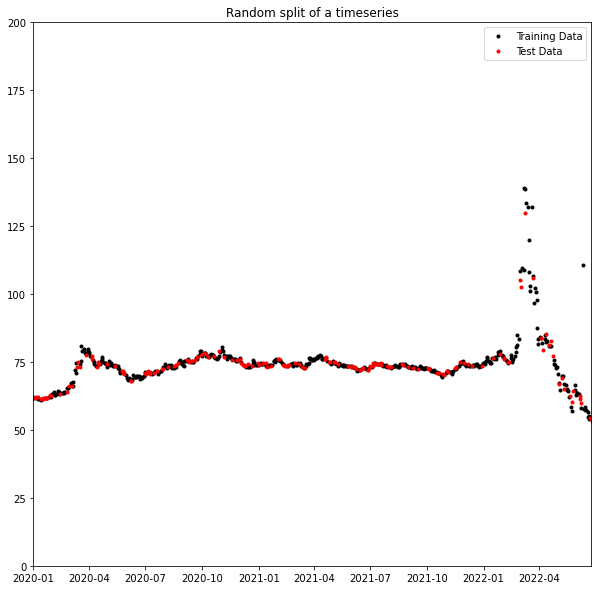

In [19]:
fig, axs = plt.subplots(figsize=[10, 10])

train, test = train_test_split(data[["Adj_close"]])

axs.plot(train, 'k.', lw=1, label="Training Data")
axs.plot(test,'r.', lw=1, label="Test Data")
axs.set_xlim([dt.date(2020, 1, 1), dt.date(2022, 6, 25)])
axs.set_ylim([0, 200])
axs.set_title(f"Random split of a timeseries")
axs.legend()
plt.plot()

###  KFOLD

In [20]:
cv = KFold()

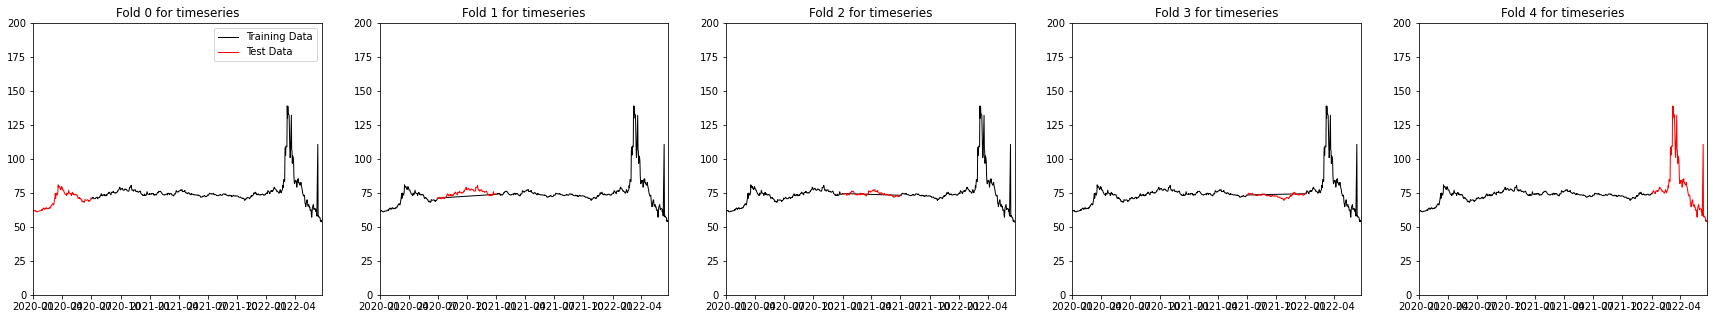

In [21]:
fig, axs = plt.subplots(ncols=5, figsize=[30, 5])

for i, (train_index, val_index) in enumerate(cv.split(data['Adj_close'])):
    axs[i].plot(data.Adj_close[train_index], 'k', lw=1, label="Training Data")
    axs[i].plot(data.Adj_close[val_index],'r', lw=1, label="Test Data")
    axs[i].set_xlim([dt.date(2020, 1, 1), dt.date(2022, 6, 25)])
    axs[i].set_ylim([0, 200])
    axs[i].set_title(f"Fold {i} for timeseries")
    if not i:
        axs[0].legend()
        plt.plot()


### Time Series Cross Validation

In [22]:
tscv = TimeSeriesSplit()
tscv

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)

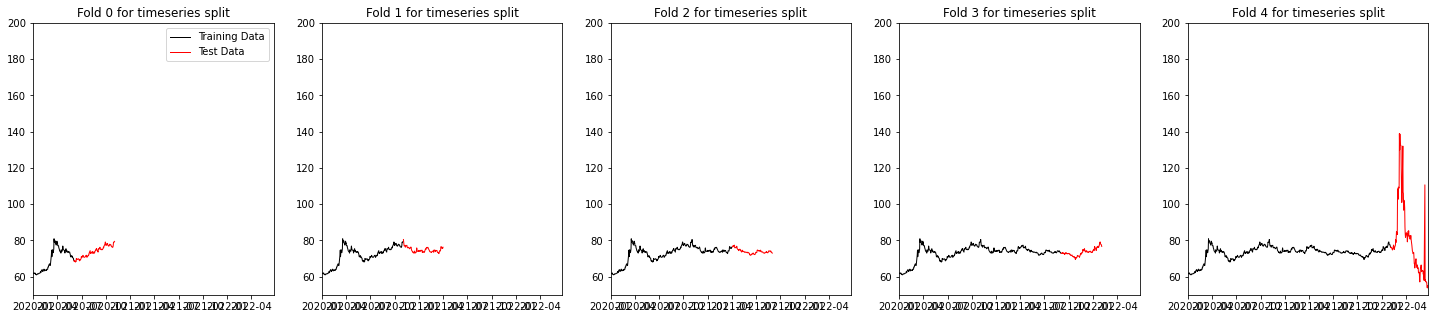

In [23]:
fig, axs = plt.subplots(ncols=5, figsize=[25, 5])

for i, (train_index, val_index) in enumerate(tscv.split(data['Adj_close'])):
    axs[i].plot(data['Adj_close'][train_index], 'k', lw=1, label="Training Data")
    axs[i].plot(data['Adj_close'][val_index],'r', lw=1, label="Test Data")
    axs[i].set_xlim([dt.date(2020, 1, 1), dt.date(2022, 6, 25)])
    axs[i].set_ylim([50, 200])
    axs[i].set_title(f"Fold {i} for timeseries split")
    if not i:
        axs[0].legend()
        plt.plot()

# PREPARING DATA FOR MACHINE LEARNING

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scale = MinMaxScaler()
# at this point I felt there was no need scaling my data since my independent variable X 
# is a date and scaling a date variable would after my forecating


In [26]:
data = data.drop(['Date'], axis =1)

In [27]:
data.head()

,Adj_close
Date,
2020-01-01,62.028301
2020-01-02,61.830002
2020-01-03,61.694199
2020-01-06,62.029999
2020-01-07,61.775002


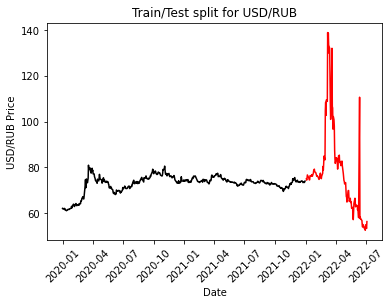

In [28]:
# Splitting the data into train and test data based on TimeSerieSplit

train = data[data.index < pd.to_datetime("2021-12-31", format='%Y-%m-%d')] # Train data is the first 2 years of the data
test = data[data.index > pd.to_datetime("2021-12-31", format='%Y-%m-%d')] # Test data is the data after the train data


plt.plot(train, color = "black", label="Training Data")
plt.plot(test, color = "red", label="Test Data")
plt.ylabel('USD/RUB Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for USD/RUB")
plt.show()

In [29]:
test.columns

Index(['Adj_close'], dtype='object')

PROPHET

- Preparing the data for the FACEBOOK PROPHET MODEL

In [30]:

data_prophet = pd.DataFrame(columns = ['ds', 'y']) # Creating a dataframe to store the x and y labels for prophet
data_prophet['ds'] = train.index # naming train independent variable as ds for prophet

train.reset_index(inplace =True)
data_prophet['y'] = train['Adj_close'] # naming the y label as y for prophet model



data_prophet.head()

,ds,y
0,2020-01-01,62.028301
1,2020-01-02,61.830002
2,2020-01-03,61.694199
3,2020-01-06,62.029999
4,2020-01-07,61.775002


In [31]:

data_prophet_test = pd.DataFrame(columns = ['ds', 'y'])
data_prophet_test['ds'] = test.index # naming test independent variable as ds for prophet
test.reset_index(inplace = True)
data_prophet_test['y'] = test['Adj_close'] # naming test dependent variable as y for prophet


data_prophet_test.head()

,ds,y
0,2022-01-03,74.986000
1,2022-01-04,74.371803
2,2022-01-05,75.263000
3,2022-01-06,76.661598
4,2022-01-07,76.353699


In [32]:
# splitting the train and test data into independent and dependent variables
train.reset_index()

x_train = train.index

y_train = train['Adj_close']

train.reset_index(inplace = True)

#Test Data
x_test = test.index


test.reset_index(inplace = True)
y_test = test['Adj_close']

y_test

0      74.986000
1      74.371803
2      75.263000
3      76.661598
4      76.353699
         ...    
127    53.714901
128    52.465099
129    54.840000
130    53.237499
131    56.250000
Name: Adj_close, Length: 132, dtype: float64

## BASELINE MODEL USING ARIMA

In [33]:
# To install the library Arima library
! pip install pmdarima

In [34]:
# Import the library
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")


In [35]:
# auto_arima provides us with the best fit model for our data. In this case auto_arima recommends SARIMAX
# model and a (pdq) of (2, 0, 1)x(0, 1, [1, 2], 12).

stepwise_fit = auto_arima(data['Adj_close'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.30 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=4628.168, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=3708.680, Time=0.52 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=4224.764, Time=0.65 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=4626.320, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=3999.535, Time=0.13 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=3648.257, Time=1.68 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=3570.324, Time=3.25 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=3569.175, Time=1.02 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=3564.914, Time=4.09 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=3567.044, Time=2.23 sec
 ARIMA(1,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=4.18 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=5.45 sec
 ARIMA(2,0,0)(1,1,2)[12] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  655
Model:             SARIMAX(2, 0, 1)x(0, 1, [1, 2], 12)   Log Likelihood               -1731.278
Date:                                 Mon, 04 Jul 2022   AIC                           3474.556
Time:                                         23:12:26   BIC                           3501.353
Sample:                                              0   HQIC                          3484.955
                                                 - 655                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7622      0.035     21.792      0.000       0.694       0.831
ar.L2          0.2136      0.034      6.252      0.000       0.147       0.281
ma.L1         -0.1869      0.039     -4.827      0.000      -0.263      -0.111
ma.S.L12      -1.0674      0.030    -35.119      0.000      -1.127      -1.008
ma.S.L24       0.2213      0.034      6.436      0.000       0.154       0.289
sigma2        12.4041      0.177     70.277      0.000      12.058      12.750
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            170487.04
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              35.20   Skew:                             5.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        82.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
# importing the SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [37]:
# checking the no of rows and column on the train data
train.shape

(522, 3)

In [38]:
# dropping unnecessary columns on the train data
train.drop(columns= 'index', axis=1)


,Date,Adj_close
0,2020-01-01,62.028301
1,2020-01-02,61.830002
2,2020-01-03,61.694199
3,2020-01-06,62.029999
4,2020-01-07,61.775002
...,...,...
517,2021-12-24,73.298798
518,2021-12-27,73.610001
519,2021-12-28,73.359001
520,2021-12-29,73.667503


In [39]:
# dropping unnecessary columns on the test data

test= test.drop(columns= 'index', axis=1)


In [40]:
# fitting the SARIMAX model and viewing the summary

model = SARIMAX(train['Adj_close'], 
                order = (0, 1, 1), 
                seasonal_order =(2, 1, 1, 12))
  
result = model.fit()
print(result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Adj_close   No. Observations:                  522
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -542.488
Date:                            Mon, 04 Jul 2022   AIC                           1094.976
Time:                                    23:12:31   BIC                           1116.138
Sample:                                         0   HQIC                          1103.274
                                            - 522                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0336      0.024     -1.404      0.160      -0.080       0.013
ar.S.L12       0.0221      0.045   

In [41]:
from sklearn.metrics import r2_score, mean_absolute_error

from statsmodels.tools.eval_measures import rmse

In [42]:
start = len(train)
end = len(train) + len(test) - 1

In [43]:
ypred_ari = result.predict(start, end, type = 'levels', 
                     dynamic = False ,enforce_stationarity=False,
                                   enforce_invertibility=False).reset_index(drop = True)

In [44]:
print(ypred_ari)

0      74.067305
1      73.999533
2      74.243827
3      74.255951
4      74.160592
         ...    
127    77.046303
128    77.016788
129    77.131324
130    77.173097
131    76.922172
Name: predicted_mean, Length: 132, dtype: float64


In [45]:
y_test

0      74.986000
1      74.371803
2      75.263000
3      76.661598
4      76.353699
         ...    
127    53.714901
128    52.465099
129    54.840000
130    53.237499
131    56.250000
Name: Adj_close, Length: 132, dtype: float64

In [46]:
act_pred_comparison = pd.DataFrame(columns = ['Date','Ya', 'Yp'])

act_pred_comparison['Yp'] = ypred_ari

act_pred_comparison['Ya'] = y_test

act_pred_comparison['Date'] = test['Date']


In [47]:
act_pred_comparison['diff'] = act_pred_comparison['Ya'] - act_pred_comparison['Yp']

The rmse for the prophet model is: 19.428036716571203
The MAE is : 13.47348245233409
The mean value for actual target variable: 78.24348137595437


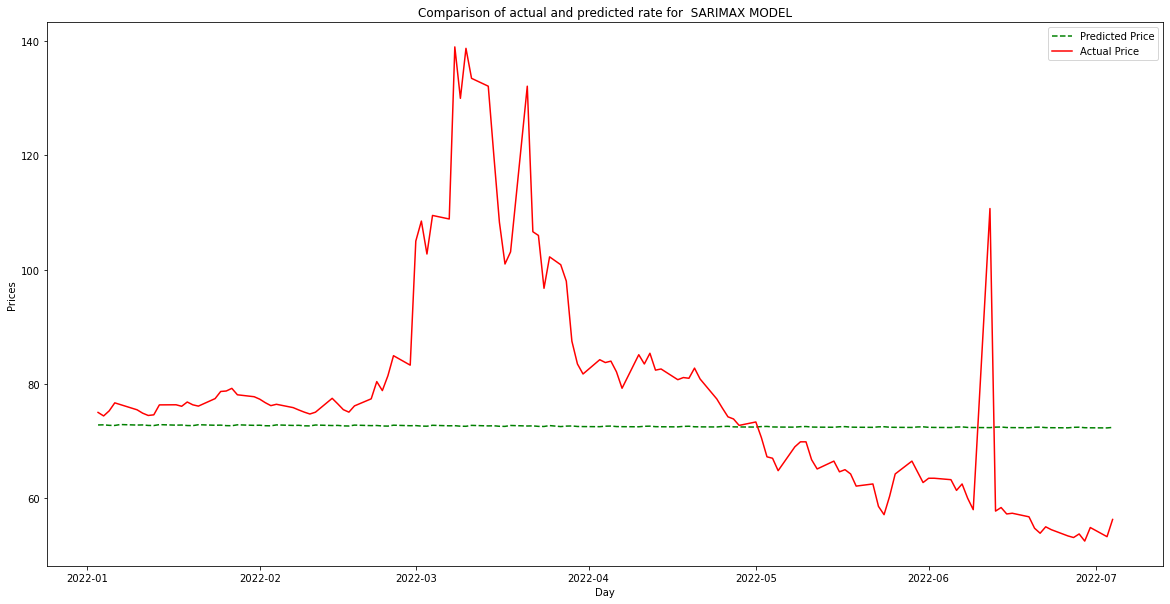

The rmse for the SARIMAX model is: 19.428036716571203
The MAE is : 13.47348245233409
The mean value for actual target variable: 78.24348137595437


In [84]:
plt.figure(figsize=(20,10))
plt.plot(act_pred_comparison['Date'], act_pred_comparison['Yp'] ,color='green', linestyle='dashed',label='Predicted Price')
plt.plot( act_pred_comparison['Date'], act_pred_comparison['Ya'], color='red', label='Actual Price')
plt.title('Comparison of actual and predicted rate for  SARIMAX MODEL')
plt.xlabel('Day')
plt.ylabel('Prices')
plt.legend()
plt.show()
        

print('The rmse for the SARIMAX model is:' , rmse(ypred_ari, y_test))


print('The MAE is :',mean_absolute_error(ypred_ari, y_test)
)
print('The mean value for actual target variable:' , y_test.mean())

### FACEBOOK PROPHET

In [50]:
! pip  install prophet

In [51]:
from prophet import Prophet

from prophet.plot import plot_plotly, plot_components_plotly

In [52]:
prophet = Prophet(changepoint_prior_scale=0.15, daily_seasonality=True)
prophet.fit(data_prophet)

23:12:36 - cmdstanpy - INFO - Chain [1] start processing
23:12:37 - cmdstanpy - INFO - Chain [1] done processing


In [53]:
forecast = prophet.predict(data_prophet_test)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
127,2022-06-28,72.360769,45.244045,97.921329,45.167907,97.467736,0.041352,0.041352,0.041352,-0.003972,-0.003972,-0.003972,0.045324,0.045324,0.045324,0.0,0.0,0.0,72.402121
128,2022-06-29,72.358412,44.909278,96.820973,44.915705,97.678336,-0.045974,-0.045974,-0.045974,-0.003972,-0.003972,-0.003972,-0.042002,-0.042002,-0.042002,0.0,0.0,0.0,72.312438
129,2022-06-30,72.356054,43.845615,97.803908,44.631613,97.888170,-0.061122,-0.061122,-0.061122,-0.003972,-0.003972,-0.003972,-0.057150,-0.057150,-0.057150,0.0,0.0,0.0,72.294932
130,2022-07-03,72.348981,43.636984,98.192220,43.706839,98.661777,-0.073837,-0.073837,-0.073837,-0.003972,-0.003972,-0.003972,-0.069865,-0.069865,-0.069865,0.0,0.0,0.0,72.275144
131,2022-07-04,72.346623,43.369980,98.961222,43.543027,98.876776,0.014909,0.014909,0.014909,-0.003972,-0.003972,-0.003972,0.018881,0.018881,0.018881,0.0,0.0,0.0,72.361532


In [54]:
forecast = forecast[['ds', 'yhat', 'yhat_lower',	'yhat_upper']]

In [77]:
plot_plotly(prophet, forecast)



### EVALUTION OF THE PROPHET MODEL

In [57]:
#creating a dataframe to compare the actual target variable to the predicted target
#variable

act_pred_comparison = pd.DataFrame(columns = ['Date','Ya', 'Yp'])

act_pred_comparison['Yp'] = forecast['yhat']

act_pred_comparison['Ya'] = data_prophet_test['y']

act_pred_comparison['Date'] = data_prophet_test['ds']



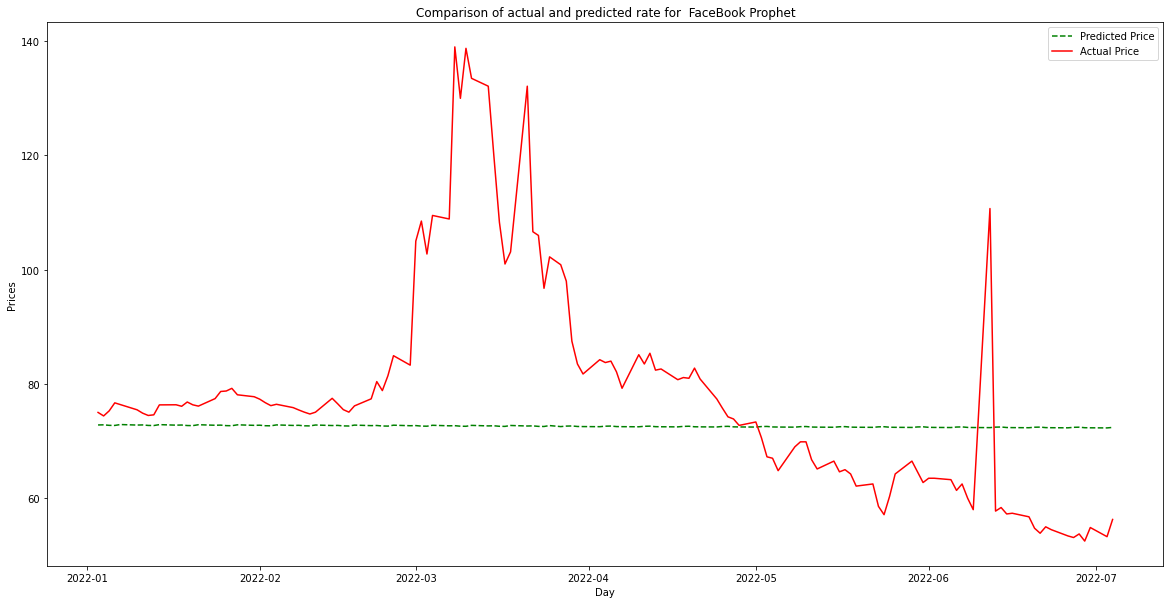

The rmse for the prophet model is: 19.59573968926403
The MAE is : 13.494744632265668
The mean value for actual target variable: 78.24348137595437


In [83]:
plt.figure(figsize=(20,10))
plt.plot(act_pred_comparison['Date'], act_pred_comparison['Yp'],color='green', linestyle='dashed',label='Predicted Price')
plt.plot(act_pred_comparison['Date'], act_pred_comparison['Ya'], color='red', label='Actual Price')
plt.title('Comparison of actual and predicted rate for  FaceBook Prophet')
plt.xlabel('Day')
plt.ylabel('Prices')
plt.legend()
plt.show()
        

#Evaluating the facebook prophet model
print('The rmse for the prophet model is:' , rmse(forecast['yhat'], data_prophet_test['y']))


print('The MAE is :',mean_absolute_error(forecast['yhat'], data_prophet_test['y'])
)
print('The mean value for actual target variable:' , data_prophet_test['y'].mean())

## XGBOOST

In [59]:
import xgboost as xgb
import datetime as dt

data.reset_index(inplace = True)

data.head()

,Date,Adj_close
0,2020-01-01,62.028301
1,2020-01-02,61.830002
2,2020-01-03,61.694199
3,2020-01-06,62.029999
4,2020-01-07,61.775002


In [60]:
# data['Date'] = pd.to_datetime(data['Date'])
data['hour'] = data['Date'].dt.hour
data['dayofweek'] = data['Date'].dt.dayofweek
data['quarter'] = data['Date'].dt.quarter
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year
data['dayofyear'] = data['Date'].dt.dayofyear
data['dayofmonth'] = data['Date'].dt.day
data['weekofyear'] = data['Date'].dt.weekofyear

In [61]:
data1 = data.drop(columns = ['Date', 'hour'])

In [62]:
data1.columns
data1.tail(5)

,Adj_close,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
650,53.714901,1,2,6,2022,179,28,26
651,52.465099,2,2,6,2022,180,29,26
652,54.840000,3,2,6,2022,181,30,26
653,53.237499,6,3,7,2022,184,3,26
654,56.250000,0,3,7,2022,185,4,27


In [63]:
df_train=data1[data1['year']<2022]
x_train_xgb=df_train.drop(['Adj_close'],axis=1)
y_train_xgb=df_train['Adj_close']

In [64]:
df_test=data1[data1['year']>=2022]
x_test_xgb=df_test.drop(['Adj_close'],axis=1)
y_test_xgb=df_test['Adj_close']

In [65]:
y_test_xgb

523    74.986000
524    74.371803
525    75.263000
526    76.661598
527    76.353699
         ...    
650    53.714901
651    52.465099
652    54.840000
653    53.237499
654    56.250000
Name: Adj_close, Length: 132, dtype: float64

In [66]:
x_test_xgb

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
523,0,1,1,2022,3,3,1
524,1,1,1,2022,4,4,1
525,2,1,1,2022,5,5,1
526,3,1,1,2022,6,6,1
527,4,1,1,2022,7,7,1
...,...,...,...,...,...,...,...
650,1,2,6,2022,179,28,26
651,2,2,6,2022,180,29,26
652,3,2,6,2022,181,30,26
653,6,3,7,2022,184,3,26


In [67]:
reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
reg = reg.fit(x_train_xgb, y_train_xgb,verbose=False)  # Change verbose to True if you want to see it train
yhat_xgb = reg.predict(x_test_xgb)

In [68]:
yhat_xgb = pd.Series(yhat_xgb)

In [69]:
#creating a dataframe to compare the actual target variable to the predicted target
#variable

Act_Pred_xgb = pd.DataFrame(columns = ['Date', 'Ya', 'Yp'])

Act_Pred_xgb['Date'] = test['Date']


Act_Pred_xgb['Yp'] = yhat_xgb

Act_Pred_xgb['Ya'] = y_test_xgb.values

In [70]:
Act_Pred_xgb

,Date,Ya,Yp
0,2022-01-03,74.986000,74.162209
1,2022-01-04,74.371803,74.197495
2,2022-01-05,75.263000,74.336563
3,2022-01-06,76.661598,74.021324
4,2022-01-07,76.353699,74.142532
...,...,...,...
127,2022-06-28,53.714901,72.210068
128,2022-06-29,52.465099,72.736183
129,2022-06-30,54.840000,72.994728
130,2022-07-03,53.237499,72.835884


## EVALUATION OF THE  XGBOOST MODEL

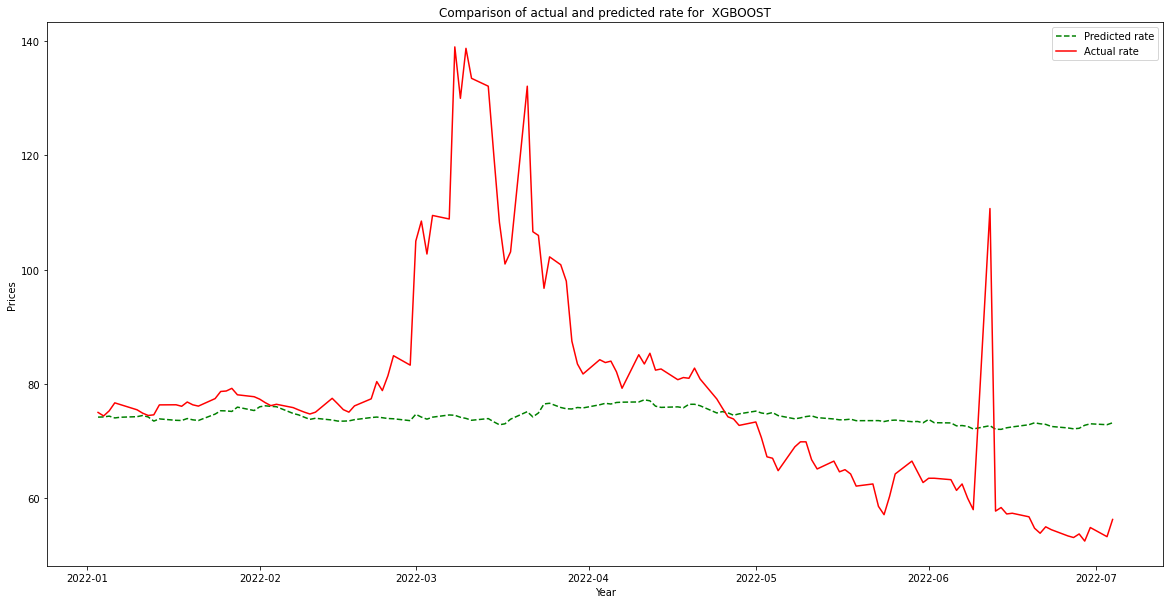

The rmse for the XGBOOST model is: 18.853205743674273
The MAE is : 12.451607964255594
The mean value for actual target variable: 78.24348137595437


In [85]:
plt.figure(figsize=(20,10))
plt.plot(Act_Pred_xgb['Date'] , Act_Pred_xgb['Yp'], color='green',  linestyle='dashed',label='Predicted rate')
plt.plot(Act_Pred_xgb['Date'],Act_Pred_xgb['Ya'], color='red', label='Actual rate')
plt.title('Comparison of actual and predicted rate for  XGBOOST')
plt.xlabel('Year')
plt.ylabel('Prices')
plt.legend()
plt.show()



#Evalution of the model using root mean square error and the mean absolute error
print('The rmse for the XGBOOST model is:' , rmse(yhat_xgb, y_test_xgb))


print('The MAE is :',mean_absolute_error(yhat_xgb, y_test_xgb)
)
print('The mean value for actual target variable:' , y_test_xgb.mean())